In [1]:
#Import Libraries
import numpy as np
import pandas as pd

In [2]:
#Load Dataset
netflix = pd.read_csv('NFLX.csv')
netflix

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100


In [3]:
#Here we have independent feature(input feature) aslo output feature(independent feature), hence a supervised learning problem
"""
'Close' is the output feature.
"""

"\n'Close' is the output feature.\n"

# Working with Data Column

In [4]:
#convert date to datetime, because its a Object type
netflix['Date'] = pd.to_datetime(netflix['Date'])

In [5]:
netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [9]:
#Now fetch 'year', 'month' and 'day' from datetime  of Date column
netflix['year'] = netflix['Date'].dt.year
netflix['month'] = netflix['Date'].dt.month
netflix['day'] = netflix['Date'].dt.day
netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,5,23
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,5,24
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,5,28
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002,5,29
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002,5,30


In [11]:
#Now drop the Date column, as we no need of it
netflix.drop('Date', axis=1, inplace=True)
netflix.head()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,5,23
1,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,5,24
2,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,5,28
3,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002,5,29
4,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002,5,30


In [12]:
#shape 
netflix.shape

(5044, 9)

In [13]:
#to check the missing values
netflix.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
year         0
month        0
day          0
dtype: int64

In [14]:
#to check duplicate values
netflix.duplicated().sum()#0=> no duplicate values

0

In [15]:
#to check datatype of the columns
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5044 non-null   float64
 1   High       5044 non-null   float64
 2   Low        5044 non-null   float64
 3   Close      5044 non-null   float64
 4   Adj Close  5044 non-null   float64
 5   Volume     5044 non-null   int64  
 6   year       5044 non-null   int64  
 7   month      5044 non-null   int64  
 8   day        5044 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 354.8 KB


In [16]:
#Note: above dataset has no 'Object' type datatype, so no worries to convert it

In [18]:
#to check the statistical feature/numerical feature of dataset
netflix.describe()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03,5044.000000,5044.000000,5044.000000
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07,2011.905630,6.545797,15.737708
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07,5.798402,3.423809,8.758690
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05,2002.000000,1.000000,1.000000
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06,2007.000000,4.000000,8.000000
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07,2012.000000,7.000000,16.000000
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07,2017.000000,10.000000,23.000000
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08,2022.000000,12.000000,31.000000


# EDA: Exploratory Data Analysis

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
#to check corelation between one to another column
corr = netflix.corr()
corr

,Open,High,Low,Close,Adj Close,Volume,year,month,day
Open,1.000000,0.999863,0.999853,0.999695,0.999695,-0.262560,0.814140,-0.004033,-0.003739
High,0.999863,1.000000,0.999815,0.999861,0.999861,-0.261281,0.814615,-0.004482,-0.003833
Low,0.999853,0.999815,1.000000,0.999856,0.999856,-0.264033,0.813706,-0.003523,-0.003572
Close,0.999695,0.999861,0.999856,1.000000,1.000000,-0.262548,0.814257,-0.004129,-0.003773
Adj Close,0.999695,0.999861,0.999856,1.000000,1.000000,-0.262548,0.814257,-0.004129,-0.003773
Volume,-0.262560,-0.261281,-0.264033,-0.262548,-0.262548,1.000000,-0.108797,-0.044664,0.032562
year,0.814140,0.814615,0.813706,0.814257,0.814257,-0.108797,1.000000,-0.072108,-0.006204
month,-0.004033,-0.004482,-0.003523,-0.004129,-0.004129,-0.044664,-0.072108,1.000000,-0.001500
day,-0.003739,-0.003833,-0.003572,-0.003773,-0.003773,0.032562,-0.006204,-0.001500,1.000000


<AxesSubplot:>

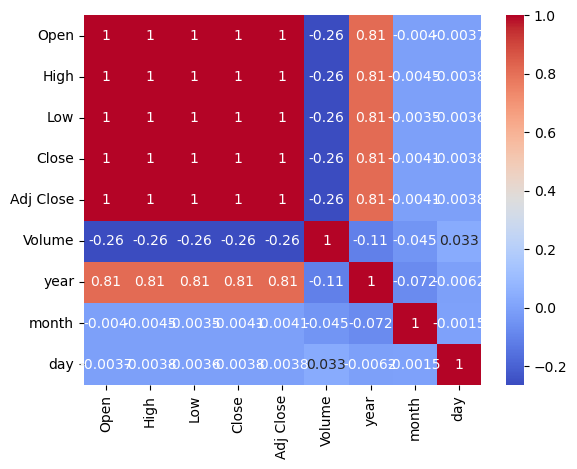

In [22]:
#visualize the co-relation using seabor
sns.heatmap(corr,annot=True, cmap='coolwarm',cbar=True)

<AxesSubplot:xlabel='Open', ylabel='Close'>

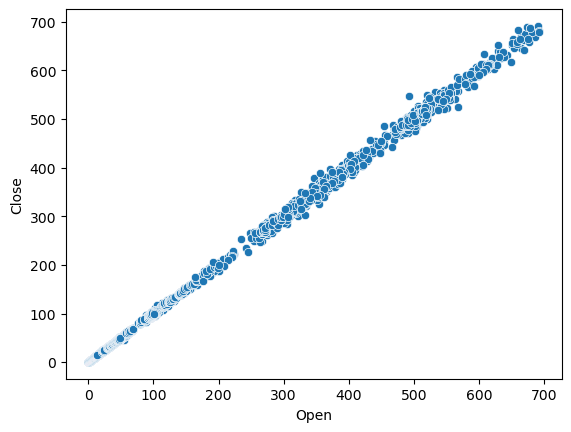

In [24]:
#Similarly to visualise using scatter plot
sns.scatterplot(x=netflix['Open'],y=netflix['Close'])

In [25]:
#Note: the above scatter plot has highly corellation between each other!

# Data Scatterness

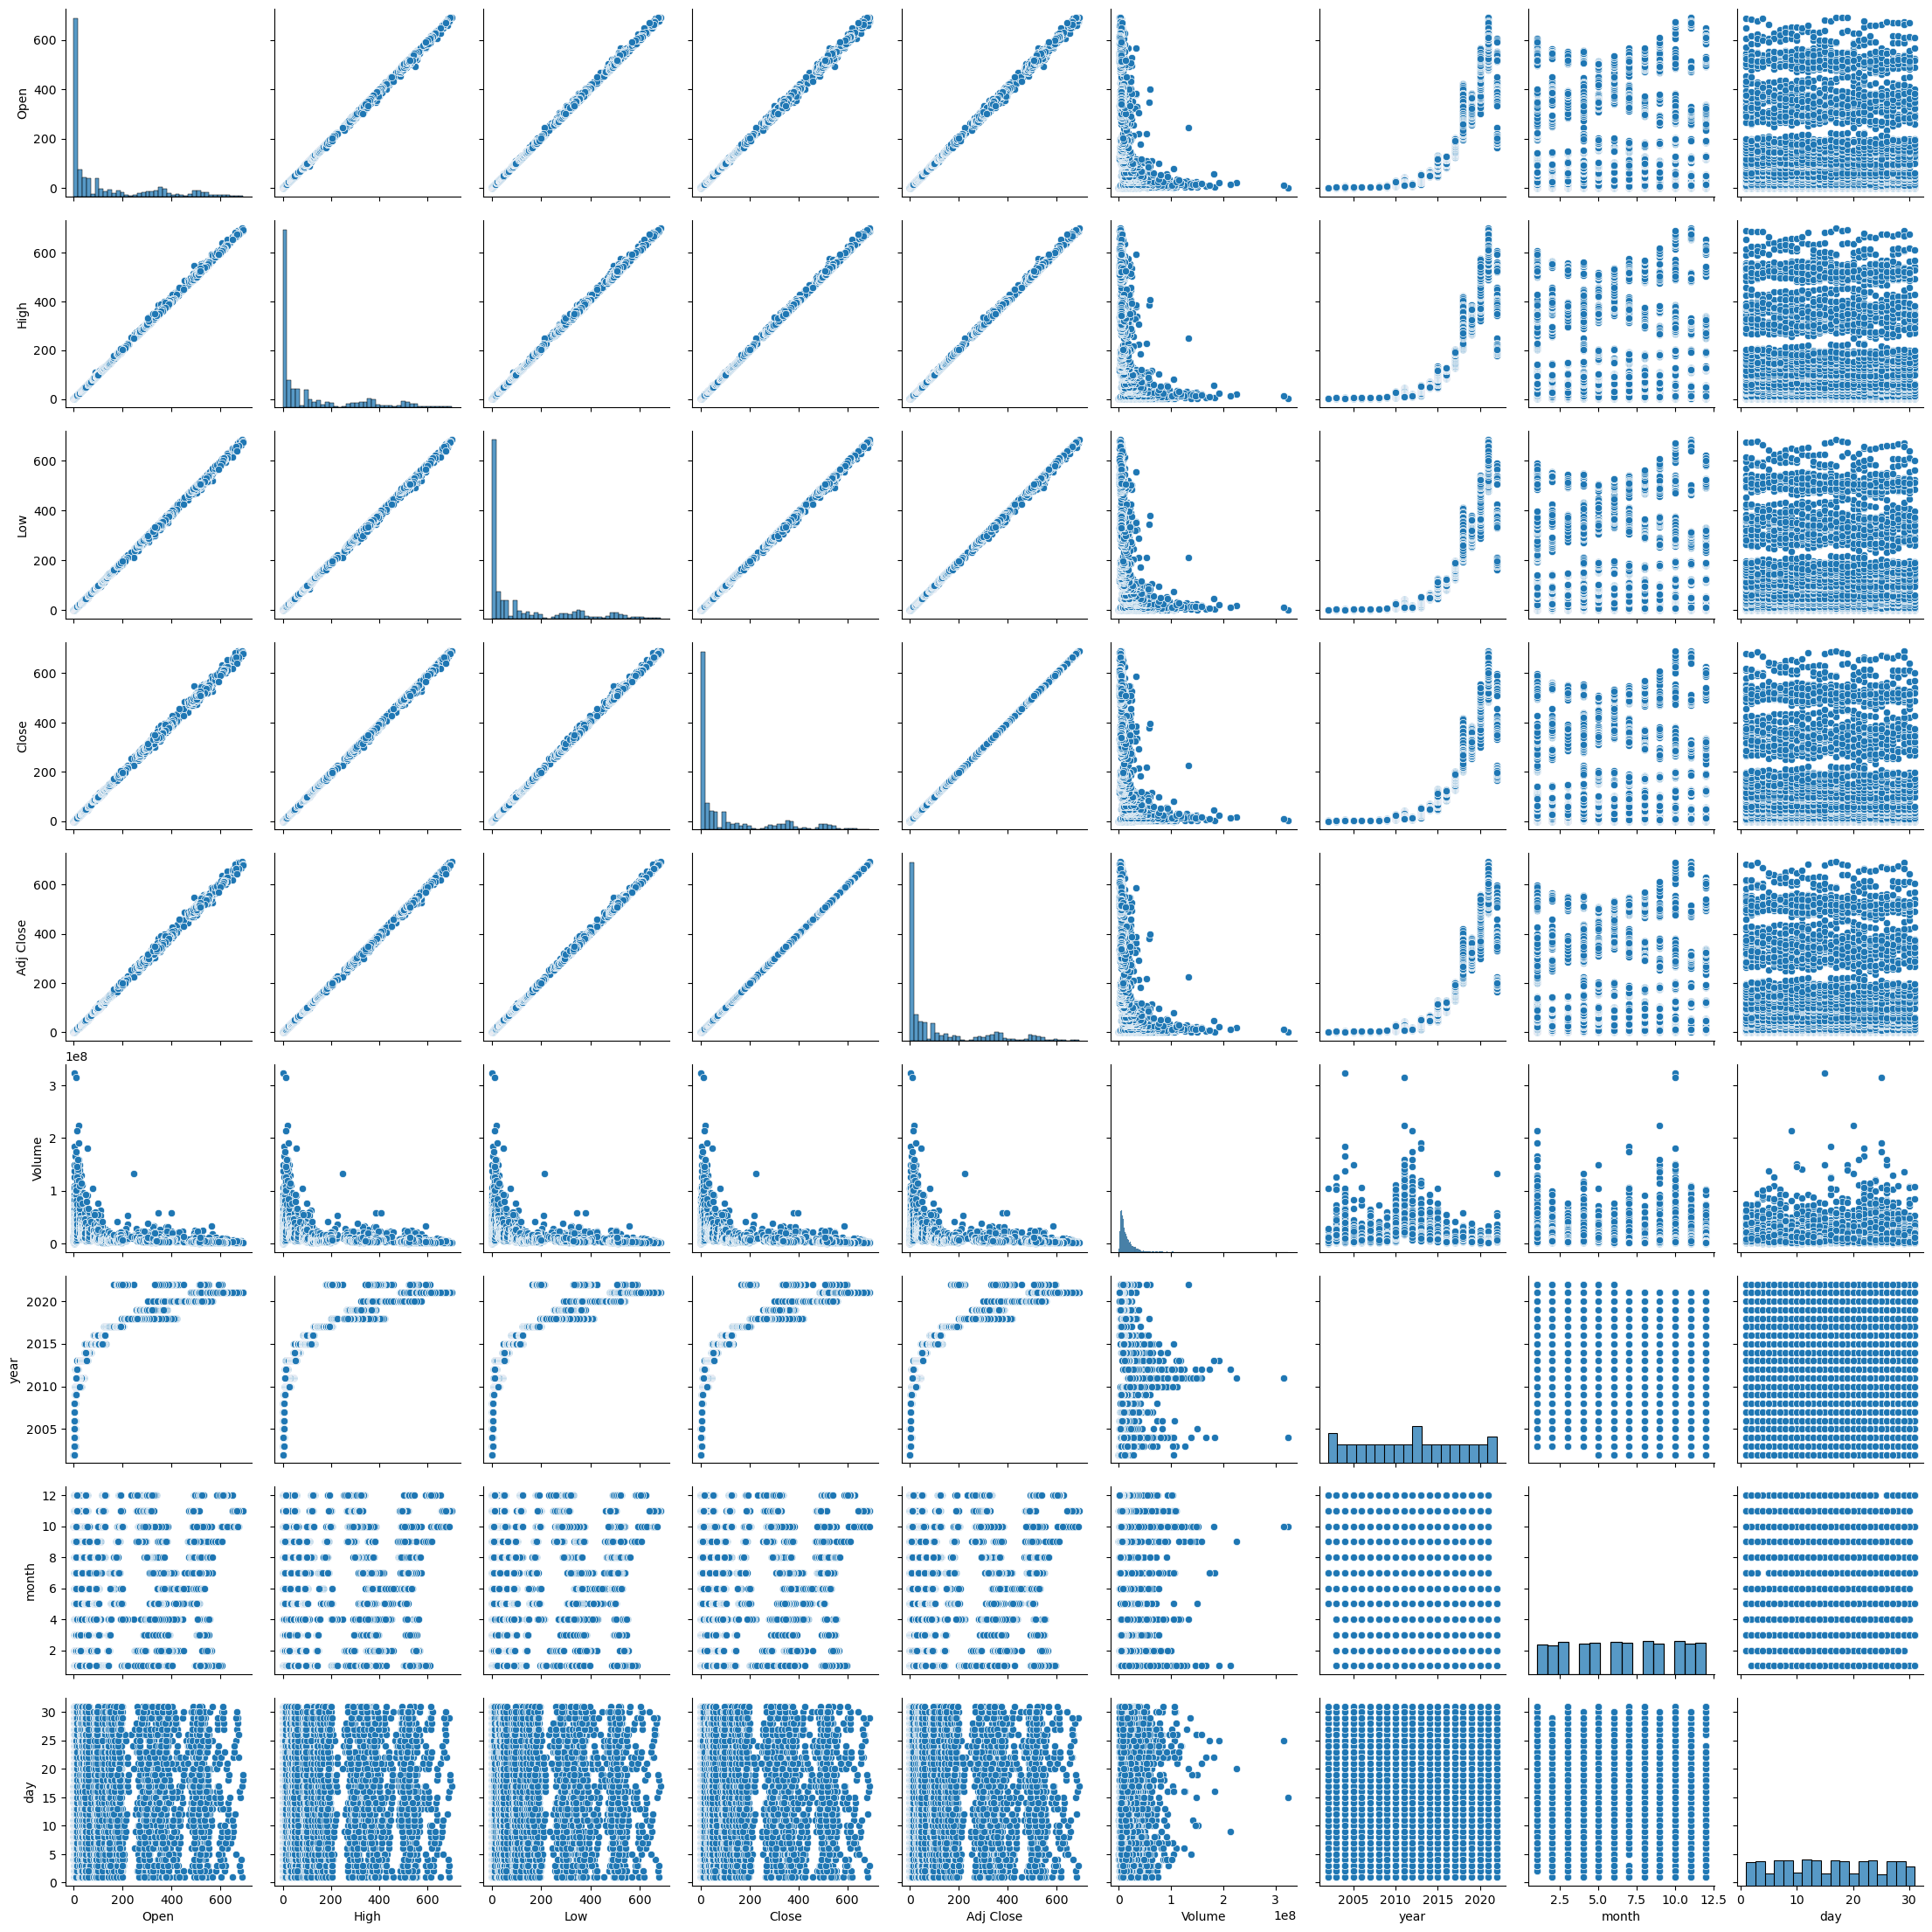

In [26]:
#Data Scatterness using pairplot
sns.pairplot(netflix)

# data destribution

C:\Users\CSC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

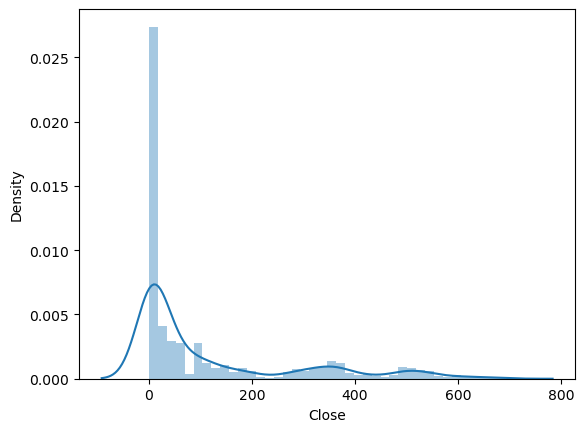

In [27]:
sns.distplot(netflix['Close'])

<Figure size 1000x600 with 0 Axes>

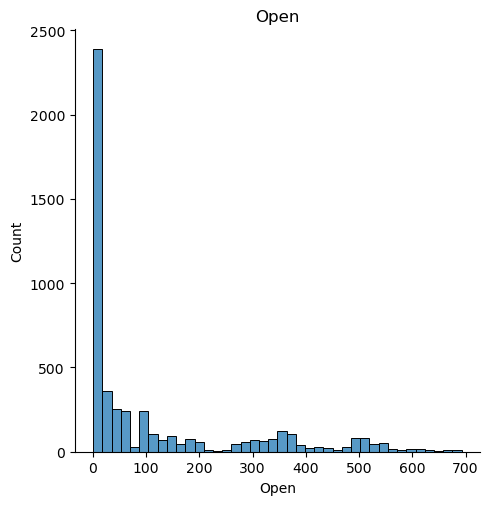

<Figure size 1000x600 with 0 Axes>

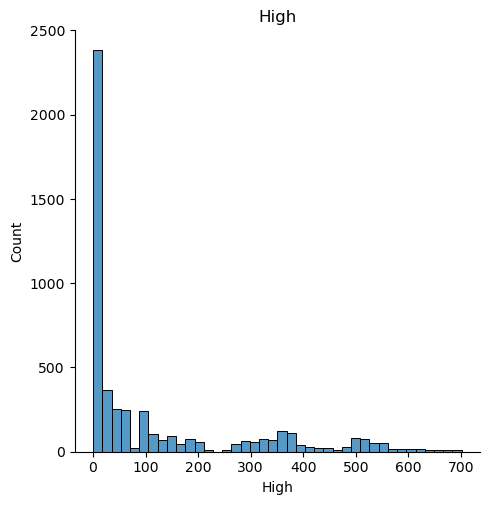

<Figure size 1000x600 with 0 Axes>

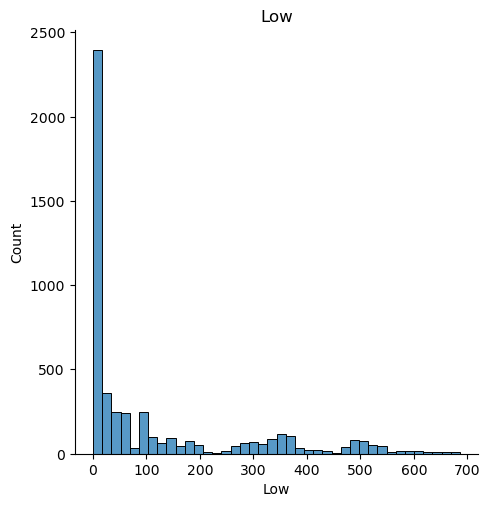

<Figure size 1000x600 with 0 Axes>

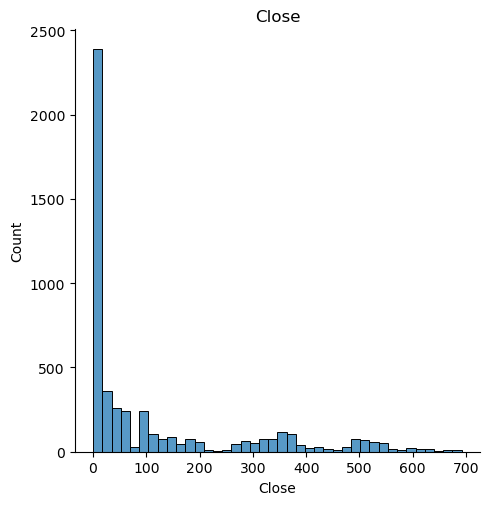

<Figure size 1000x600 with 0 Axes>

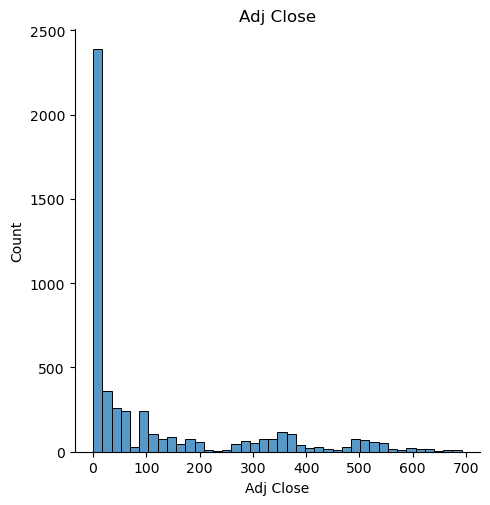

<Figure size 1000x600 with 0 Axes>

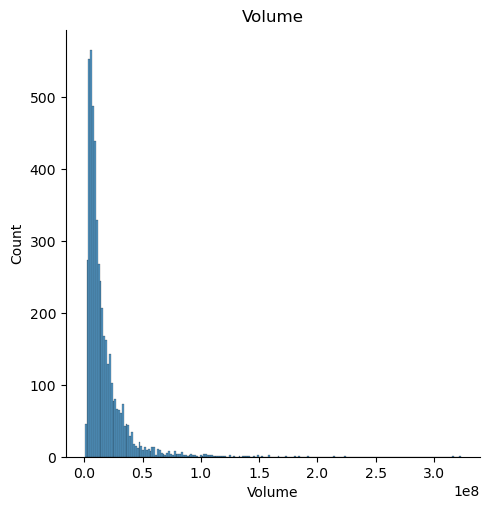

<Figure size 1000x600 with 0 Axes>

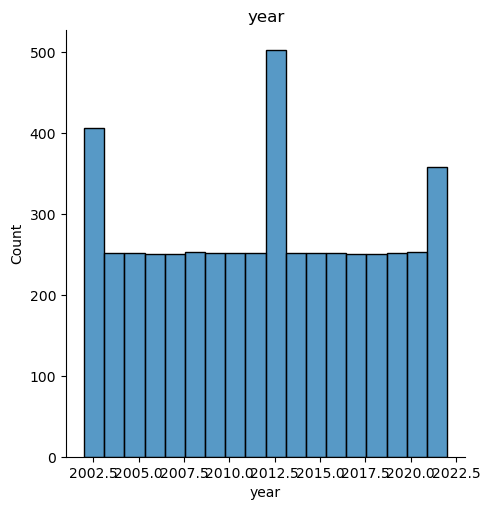

<Figure size 1000x600 with 0 Axes>

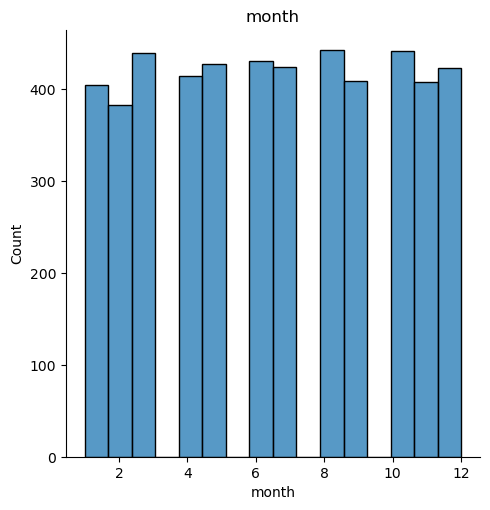

<Figure size 1000x600 with 0 Axes>

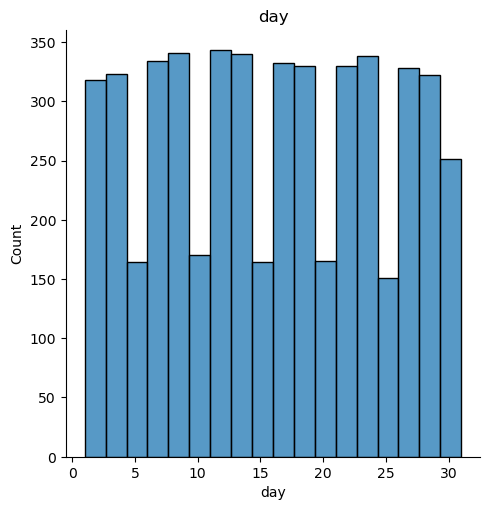

In [29]:
for i in netflix.columns:
    plt.figure(figsize=(10,6))
    sns.displot(netflix[i])
    plt.title(i)
    plt.show()

# Train Test Split

In [30]:
X = netflix.drop('Close', axis=1)
y = netflix['Close']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33, random_state=42)


In [34]:
X_train.shape

(3379, 8)

In [36]:
X_test.shape

(1665, 8)

In [37]:
netflix.shape

(5044, 9)

In [38]:
netflix.head()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,5,23
1,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,5,24
2,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,5,28
3,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002,5,29
4,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002,5,30


In [39]:
#Lets check if we need to normalize or not normalize the dataset using StandardScaler. netflix.describe() if 0-1 range okay if 0-10000 we need to normalize
netflix.describe()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03,5044.000000,5044.000000,5044.000000
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07,2011.905630,6.545797,15.737708
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07,5.798402,3.423809,8.758690
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05,2002.000000,1.000000,1.000000
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06,2007.000000,4.000000,8.000000
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07,2012.000000,7.000000,16.000000
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07,2017.000000,10.000000,23.000000
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08,2022.000000,12.000000,31.000000


# Normalizating Data Using StandarScaler

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train

array([[ 0.24027557,  0.22730908,  0.23896511, ...,  0.86076719,
        -0.45657093, -0.52915697],
       [-0.67594432, -0.67673549, -0.67558046, ..., -1.03763995,
        -0.16537554, -0.98357501],
       [-0.68444224, -0.68468415, -0.68393938, ..., -1.38280489,
         0.41701524, -0.64276148],
       ...,
       [-0.29770315, -0.30201062, -0.2968212 , ...,  0.34301978,
         0.70821063, -1.32438854],
       [ 0.22716063,  0.21726603,  0.21190904, ...,  0.86076719,
        -0.45657093,  0.1524701 ],
       [-0.67564321, -0.67634795, -0.67615811, ..., -1.21022242,
         0.99940602,  0.49328363]])

# LinearRegression Model for Training preprocessed Netflix Dataset

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#train
lr.fit(X_train,y_train)

#prediction on test set
y_pred = lr.predict(X_test)
y_pred

array([117.410004, 435.549988,   3.394286, ...,  23.158571, 351.769989,
       370.019989])

# Performance Matrix: Evaluate

In [48]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)


1.0

In [49]:
mean_squared_error(y_test,y_pred)

9.972271640208377e-27

In [52]:
# Prediction Model
def pred(Open,High,Low,Adj_Close,Volume,year,month,day):
    features = np.array([[Open,High,Low,Adj_Close,Volume,year,month,day]])
    features = scaler.fit_transform(features)
    prediction = lr.predict(features).reshape(1,-1)
    return prediction[0]
    
Open = 200.45
High = 250.45
Low = 150.45
Adj_Close = 100.34
Volume = 100.45
year = 2020
month = 8
day = 4

res = pred(Open,High,Low,Adj_Close,Volume,year,month,day)
res

array([119.31533109])

# Save the Model

In [53]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))